# PART I

## THE DATASETS

For this excersize two datasets were used. The values are real measurments.

### - room temperature
A real room temperature dataset was obtained from this [ROOM TEMPERATURE REPO](https://github.com/johnmyleswhite/room_temperatures). <br>The temerature for 'Room 1' will be used hereinafter for all demos.

### - efficient transfomer
Another dataset, from the [Beyond Efficient Transformer paper](https://arxiv.org/pdf/2012.07436) obtained from
[ET REPO](https://github.com/zhouhaoyi/ETDataset)

In [1]:
# OBTAINING THE DATA
import pandas as pd
import numpy as np

from temperature_calculator.utils.datasets import (
    load_room_temperature_data, 
    load_et_temperature_data,
)

from temperature_calculator.data.averages import *
from temperature_calculator.utils.constants import *
from temperature_calculator.data.preprocessing import *
from temperature_calculator.data.postprocessing import *
from temperature_calculator.models.training import *

Demo of <b>SIMPLE</b> and <b>WEIGHTED</b> averages on 
### - room temperature


In [2]:
room_temperature = convert_timestamp(
    df=load_room_temperature_data(),
    time_column_source = TIME,
    time_column_target = MINUTES,
    verbose=True,
)
room_temperature.head()

INFO:Temperature calculator:LOADING DATA FROM  datasets/room_temperatures/temperatures.csv
INFO:Temperature calculator:CONVERTING TIMESTAMP TO NUMERIC


,time,temperature,minutes
0,2018-09-17 00:00:00,79.11,25618800.0
1,2018-09-17 00:01:00,79.11,25618801.0
2,2018-09-17 00:02:00,79.11,25618802.0
3,2018-09-17 00:03:00,79.07,25618803.0
4,2018-09-17 00:04:00,79.05,25618804.0


In [3]:
# INDEED THE FULL DATASET IS IN MINTUE INTENSITY
room_temperature[MINUTES].diff().value_counts()

1.0    43198
2.0        1
Name: minutes, dtype: int64

In [4]:
result = calculate_mean_temperatures(
    df = room_temperature,
    frac=0.03,
    time_column=TIME,
    numeric_time_column=MINUTES,
    temperature_column=TEMPERATURE,
    verbose=True,
    methods=['wa', 'sa']
)

INFO:Temperature calculator:GENERATING NON-EQUIDISTANT SAMPLE
INFO:Temperature calculator:DISTRIBUTION OF TIME GAPS
|	GAP	|	COUNT
------------------------------
|	7.0	|	43
|	4.0	|	39
|	8.0	|	39
|	1.0	|	38
|	10.0	|	37
|	6.0	|	36
|	9.0	|	34
|	2.0	|	33
|	11.0	|	32
|	13.0	|	31
|	16.0	|	30
|	3.0	|	30
|	12.0	|	28
|	18.0	|	27
|	17.0	|	26
|	15.0	|	24
|	21.0	|	23
|	31.0	|	23
|	19.0	|	23
|	5.0	|	22
|	35.0	|	21
|	20.0	|	21
|	23.0	|	20
|	22.0	|	18
|	26.0	|	18
|	29.0	|	18
|	28.0	|	18
|	14.0	|	17
|	30.0	|	16
|	24.0	|	16
|	27.0	|	15
|	45.0	|	15
|	38.0	|	14
|	34.0	|	14
|	46.0	|	14
|	40.0	|	13
|	25.0	|	13
|	48.0	|	13
|	42.0	|	12
|	37.0	|	12
|	43.0	|	12
|	49.0	|	11
|	36.0	|	11
|	57.0	|	10
|	44.0	|	10
|	39.0	|	10
|	61.0	|	9
|	56.0	|	9
|	47.0	|	9
|	54.0	|	8
|	33.0	|	8
|	53.0	|	8
|	50.0	|	7
|	58.0	|	7
|	64.0	|	6
|	78.0	|	6
|	63.0	|	6
|	32.0	|	6
|	75.0	|	6
|	55.0	|	6
|	66.0	|	6
|	52.0	|	6
|	62.0	|	6
|	60.0	|	5
|	68.0	|	5
|	71.0	|	5
|	41.0	|	5
|	69.0	|	5
|	74.0	|	5
|	65.0	|	5
|	82.0	|	5
|	70.0	|	5
|	87.0	|	4

AVERAGE TEMPERATURE BETWEEN 2018-10-07 07:33:00 AND 2018-10-12 05:56:00 
	 - SIMPLE	 77.28235555555557 
	 - WEIGHTED	 77.24362902083038 
	 - REAL VALUE	 77.24412419036891


In [5]:
results_room_temperature = []
log_every = 300
ntrials = 1000
for i in range(ntrials):
    if i/log_every==i//log_every:
        print(i,"/", ntrials)
    results_room_temperature.append(
        calculate_mean_temperatures(
                df = room_temperature,
                frac=0.05,
                time_column=TIME,
                numeric_time_column=MINUTES,
                temperature_column=TEMPERATURE,
                verbose=False,
                methods=('wa', 'sa')
            )
    )

0 / 1000
300 / 1000
600 / 1000
900 / 1000


# DIFFERENCE BETWEEN SIMPLE MEAN AND REAL MEAN

count    1000.000000
mean        0.061923
std         0.055856
min         0.000150
25%         0.023848
50%         0.047978
75%         0.082456
max         0.505461
Name: diff_rmean_smean, dtype: float64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# DIFFERENCE BETWEEN WEIGHTED MEAN AND REAL MEAN

count    1000.000000
mean        0.012954
std         0.018700
min         0.000005
25%         0.002958
50%         0.006635
75%         0.015850
max         0.239778
Name: diff_rmean_wmean, dtype: float64


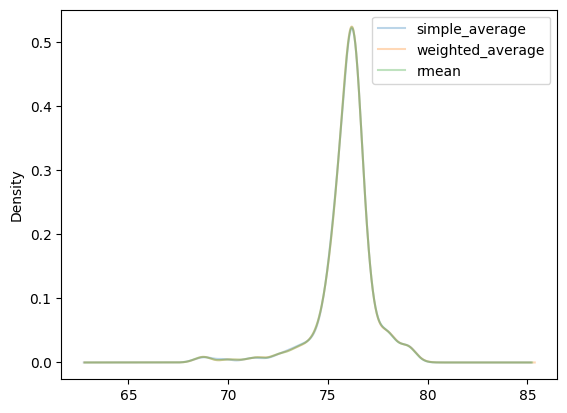

In [6]:
summarize_results(results_room_temperature)

As we see, the room temperature dataset doesn't have huge variablity in general. Still even here it is clear that <b>WEIGHTED MEAN</b> is apparently a better solution, as both in terms of average difference from real values and standard deviation of difference the <b>WEIGHTED MEAN</b> outperforms the <b>SIMPLE MEAN</b>.


A Demo on
### - efficient transfomer


In [7]:
ett_dataset = load_et_temperature_data()
ett_dataset.head()

INFO:Temperature calculator:LOADING DATA FROM  datasets/ETDataset/ETT-small/ETTh1.csv


,time,temperature
0,2016-07-01 00:00:00,30.531000
1,2016-07-01 01:00:00,27.787001
2,2016-07-01 02:00:00,27.787001
3,2016-07-01 03:00:00,25.044001
4,2016-07-01 04:00:00,21.948000


In [8]:
ett_dataset = convert_timestamp(
    df=ett_dataset,
    time_column_source = TIME,
    time_column_target = HOURS,
    verbose=True,
    
)
ett_dataset.head()

INFO:Temperature calculator:CONVERTING TIMESTAMP TO NUMERIC


,time,temperature,hours
0,2016-07-01 00:00:00,30.531000,407588.0
1,2016-07-01 01:00:00,27.787001,407589.0
2,2016-07-01 02:00:00,27.787001,407590.0
3,2016-07-01 03:00:00,25.044001,407591.0
4,2016-07-01 04:00:00,21.948000,407592.0


In [9]:
results_ett = []
log_every = 300
ntrials = 1000
for i in range(ntrials):
    if i/log_every==i//log_every:
        print(i,"/", ntrials)
    results_ett.append(
        calculate_mean_temperatures(
                df = ett_dataset,
                frac=0.2,
                time_column=TIME,
                numeric_time_column=HOURS,
                temperature_column=TEMPERATURE,
                verbose=False,
                methods=('wa', 'sa'),
            )
    )

0 / 1000
300 / 1000
600 / 1000
900 / 1000


# DIFFERENCE BETWEEN SIMPLE MEAN AND REAL MEAN

count    1000.000000
mean        0.131751
std         0.127035
min         0.000438
25%         0.049976
50%         0.098829
75%         0.174178
max         1.701032
Name: diff_rmean_smean, dtype: float64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# DIFFERENCE BETWEEN WEIGHTED MEAN AND REAL MEAN

count    1000.000000
mean        0.059115
std         0.095447
min         0.000076
25%         0.017067
50%         0.036492
75%         0.073188
max         1.816577
Name: diff_rmean_wmean, dtype: float64


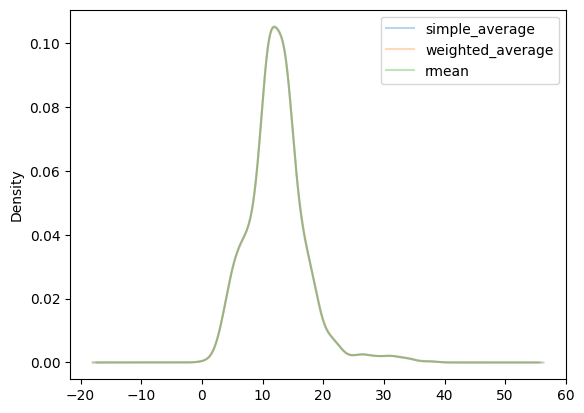

In [10]:
summarize_results(results_ett)

The same is in Efficient tranformer dataset - although the difference is less severe.

In [11]:
room_temperature.temperature.describe()

count    43200.000000
mean        75.689375
std          3.028870
min         66.900000
25%         74.080000
50%         76.530000
75%         77.900000
max         80.800000
Name: temperature, dtype: float64

In [12]:
ett_dataset.temperature.describe()

count    17420.000000
mean        13.324672
std          8.566946
min         -4.080000
25%          6.964000
50%         11.396000
75%         18.079000
max         46.007000
Name: temperature, dtype: float64

Although the variablity in <b>efficient transformer</b> dataset is higher, however, the time scale is less sparse. It would be interesting to see the difference on datasets on processes like metal melting/cooling or places with more extreme variablity and material state change - where the measurements would capture the characteristic heating/cooling curves - however I don't yet have such a dataset at hand.

In [13]:
# FIN